In [70]:
# Taken from book to download scripts
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [71]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/estimation.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

In [72]:
# Imports scipts used
import nsfg
import pandas as pd
import thinkplot
import thinkstats2
import math
import random
import numpy as np
from estimation import RMSE, MeanError
import first

7-1 Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [73]:
# Creates Data
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [74]:
# Creates Total Weight
birth_weight = live.totalwgt_lb

In [75]:
# Creates Ages Pregnant
age_preg = live.agepreg

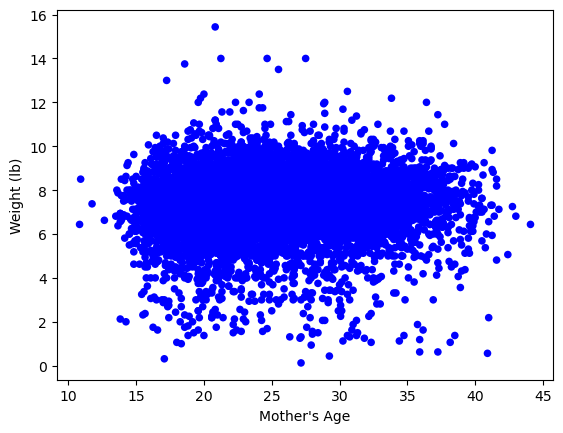

In [76]:
# Creates Scatter Plot
thinkplot.Scatter(age_preg, birth_weight, alpha=1)
thinkplot.Config(xlabel="Mother's Age",
                 ylabel='Weight (lb)',
                 legend=False)

In [77]:
# Displays Pearson's and Spearman's Correlation
print("Pearson's Correlation", thinkstats2.Corr(age_preg, birth_weight))
print("Spearman's Correlation", thinkstats2.SpearmanCorr(age_preg, birth_weight))

Pearson's Correlation 0.06883397035410911
Spearman's Correlation 0.09461004109658226


The scatter plot shows a week correlation between age and weight since it is non linear. Both Pearson and Spearman correlation are low and support the weak correlation in the scatter plot. 

8-1 In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [78]:
# Mean Error Function
def Mean_Error(n=7, m=100000):
    mu = 0
    sigma = 1
    
    # Creates mean and median lists
    means = []
    medians = []
    # Calculation of Mean Error
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        # Adds values to list
        means.append(xbar)
        medians.append(median)
    
    # Displays Results
    print('MSE Results')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))

In [79]:
# Bias Function
def Bias(n=7, m=100000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Biased vs Unbiased Results')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

In [80]:
def main(): 
    Mean_Error()
    Bias()
    
if __name__ == '__main__':
    main()

MSE Results
mean error xbar 0.0003920250241303121
mean error median 0.0007809353008293616
Biased vs Unbiased Results
RMSE biased 0.5140058974128343
RMSE unbiased 0.5764352241123035


8-2 Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

In [81]:
# Calculates RMSE grabbed from book
def RMSE(estimates, actual):
    # Calculation
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [82]:
# Used from Estimation.py
def SimulateSample(lam=2, n=10, m=1000):
    # lam: parameter of an exponential distribution
    # n: sample size
    # m: number of iterations
    
    # Establishes Plots for percentiles, used later
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='red', linewidth=3)

    # Creates Estimates list
    estimates = []
    # Calculation
    for j in range(m):
        xs = np.random.exponential(1/lam, n)
        lamhat = 1/np.mean(xs)
        # Adds calculation to list
        estimates.append(lamhat)
    
    # Calculate Standard Error base on estimate list and exponential parameter
    standard_error = RMSE(estimates, lam)
    print('standard error', standard_error)

    # Creates estimates cdf
    cdf = thinkstats2.Cdf(estimates)
    
    # Creates confidence interval based on 90%
    confidence_interval = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', confidence_interval)
    
    # Plots lines for 5th and 95th Percentile
    VertLine(confidence_interval[0])
    VertLine(confidence_interval[1])

    # Plots the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Show(root='estimation2',
                   xlabel='estimate',
                   ylabel='CDF',
                   title='Sampling distribution')

    return standard_error

Sample size: 10
standard error 0.8026281306832422
confidence interval (1.2894786659794217, 3.534847307551774)


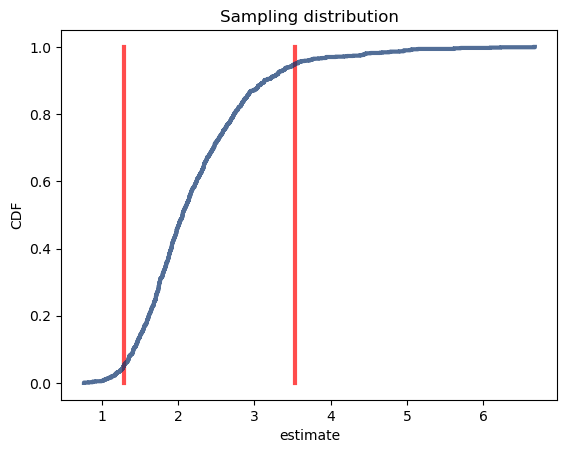

Sample size: 50
standard error 0.3013747624233301
confidence interval (1.6096525122515635, 2.575582712058378)


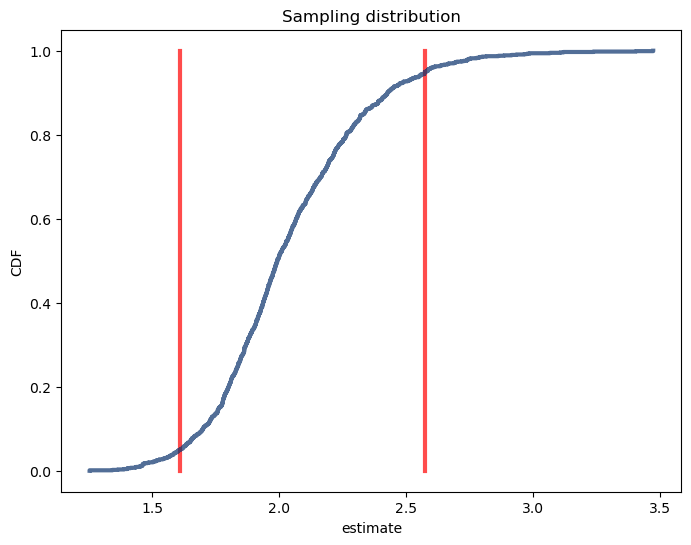

Sample size: 100
standard error 0.20038615457224068
confidence interval (1.6965719075499197, 2.3586207627256424)


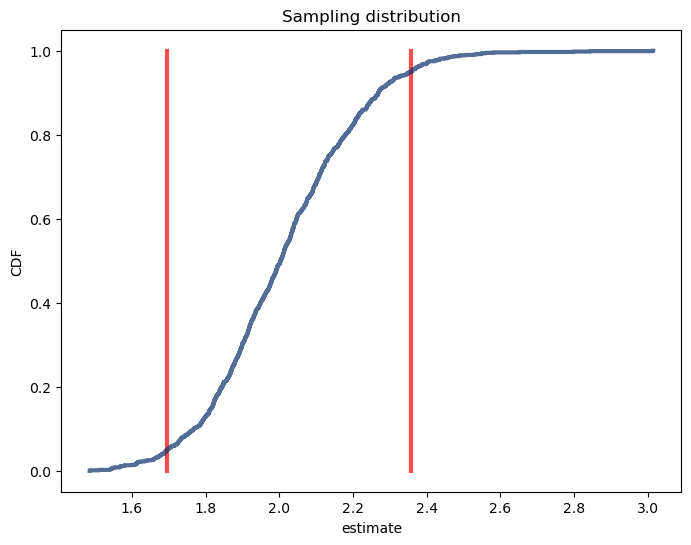

<Figure size 800x600 with 0 Axes>

In [83]:
def main(): 
    # Establishes different values for sample size
    for n in [10, 50, 100]:
        print('Sample size:', n)
        stderr = SimulateSample(n=n)
        
    
if __name__ == '__main__':
    main()